In [3]:
import cv2
import numpy as np
import scipy.io as sio
from scipy.linalg import null_space
import matplotlib.pyplot as plt
import sys
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def find_match(img1, img2):
    # TO DO
    sift1 = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift1.detectAndCompute(img1,None)

    sift2 = cv2.xfeatures2d.SIFT_create()
    kp2, des2 = sift2.detectAndCompute(img2,None)
    
    nbrs = NearestNeighbors(algorithm='auto').fit(des2)
    
    distances, indices =nbrs.kneighbors(des1,n_neighbors=2)
    
    nbrs_2 = NearestNeighbors(algorithm='auto').fit(des1)
    
    distances_2, indices_2 =nbrs_2.kneighbors(des2,n_neighbors=2)
    
    x1_12 = np.empty((0,2))
    x2_12 = np.empty((0,2))
    
    for i in range(len(distances)):
        if (distances[i,0]/distances[i,1])<0.5:
            x1_12 = np.append(x1_12, kp1[i].pt)
            x2_12 = np.append(x2_12, kp2[indices[i,0]].pt)
            
    x1_12 = x1_12.reshape(len(x1_12)//2,2)
    x2_12 = x2_12.reshape(len(x2_12)//2,2)

    
    x1_21 = np.empty((0,2))
    x2_21 = np.empty((0,2))
    
    for i in range(len(distances_2)):
        if (distances_2[i,0]/distances_2[i,1])<0.5:
            x2_21 = np.append(x2_21, kp2[i].pt)
            x1_21 = np.append(x1_21, kp1[indices_2[i,0]].pt)
    
    x1_21 = x1_21.reshape(len(x1_21)//2,2)
    x2_21 = x2_21.reshape(len(x2_21)//2,2)
    
    set_1 =  np.concatenate((x1_12, x2_12), axis=1)
    set_2 =  np.concatenate((x1_21, x2_21), axis=1)
    
    set_1_v = set_1.view([('', set_1.dtype)] * set_1.shape[1]).ravel()
    set_2_v = set_2.view([('', set_2.dtype)] * set_2.shape[1]).ravel()
    final_p = np.intersect1d(set_1_v, set_2_v).view(set_1.dtype).reshape(-1, set_1.shape[1])
    
    pts1 = final_p[:,0:2]
    pts2 = final_p[:,2:]

    
    return pts1, pts2

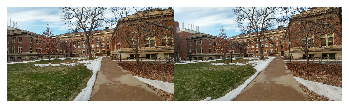

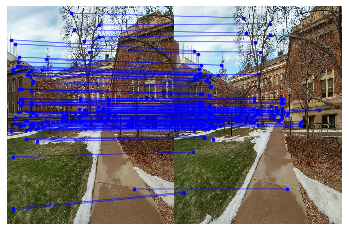

In [8]:
img_left = cv2.imread('./left.bmp', 1)
img_right = cv2.imread('./right.bmp', 1)
visualize_img_pair(img_left, img_right)

# Step 1: find correspondences between image pair
pts1, pts2 = find_match(img_left, img_right)
visualize_find_match(img_left, img_right, pts1, pts2)

In [9]:
A = np.array([[1,2,3],[2,5,6],[2,4,6]])
#A = np.random.rand(3,3)

print(A)
u, s, vh = np.linalg.svd(A,full_matrices=False)
print(s)
print(vh)
v= vh.T
f = v[:, -1]
print(f)
A@f

[[1 2 3]
 [2 5 6]
 [2 4 6]]
[1.16029569e+01 6.09419469e-01 1.04487240e-17]
[[-2.58377390e-01 -5.76551162e-01 -7.75132171e-01]
 [ 1.82321486e-01 -8.17061049e-01  5.46964458e-01]
 [ 9.48683298e-01  5.55111512e-17 -3.16227766e-01]]
[ 9.48683298e-01  5.55111512e-17 -3.16227766e-01]


array([0., 0., 0.])

In [156]:
sample_num = len(pts1)
draw_num = 8
draw = np.random.choice(sample_num, draw_num,replace=False)
pts1_draw = pts1[draw, :]
pts2_draw = pts2[draw, :]
        
        
A = []
# generate matrix A for A * F = 0 
        
for j in range(draw_num):
    temp = np.outer(np.append(pts2_draw[j],1),np.append(pts1_draw[j],1))
    A.append(np.reshape(temp,np.size(temp) )) 
        
A = np.reshape(A,(draw_num,np.size(temp)))
#[u,d,v] = svd(A)
        
        
u, s, vh = np.linalg.svd(A)
v= vh.T

f = v[:, -1].reshape((3,3))

U,D,VH =  np.linalg.svd(f)

D[-1] = 0

F_temp = U @ np.diag(D) @ VH

print(f)
print(F_temp)

z = 10

print(temp_2)

P =[]
for j in range(draw_num):
    temp = np.outer(np.append(pts2_draw[j],1),np.append(pts1_draw[j],1))
    P.append(np.reshape(temp,np.size(temp) )) 
        
P = np.reshape(P,(draw_num,np.size(temp)))

d = P@F_temp.reshape((np.size(F_temp),1))

print(d)       

[[-4.21989941e-07  5.77019135e-05 -1.51263947e-02]
 [-5.19854530e-05 -9.17646446e-07  9.63760455e-03]
 [ 1.38955364e-02 -1.33413826e-02  9.99653552e-01]]
[[-4.09028386e-07  5.77207820e-05 -1.51263946e-02]
 [-5.19708242e-05 -8.96350872e-07  9.63760463e-03]
 [ 1.38955364e-02 -1.33413825e-02  9.99653552e-01]]
[6.29511747e+03 3.81780492e+04 1.31142944e+02 1.39860110e+04
 8.48210724e+04 2.91363373e+02 4.80019531e+01 2.91117828e+02
 1.00000000e+00]
[[0.00219125]
 [0.01519127]
 [0.00399713]
 [0.00976676]
 [0.00619005]
 [0.00341805]
 [0.0048481 ]
 [0.00292601]]


In [164]:
print(A.shape)
bb = A@F_temp.reshape((9,1))
np.sum(np.where(bb<0.02,1,0))
print(abs(bb))

(8, 9)
[[0.00219125]
 [0.01519127]
 [0.00399713]
 [0.00976676]
 [0.00619005]
 [0.00341805]
 [0.0048481 ]
 [0.00292601]]


In [358]:
def compute_F(pts1, pts2):
    # TO DO
    sample_num = len(pts1)
    inlier_record = 0
    inlierThresh = 0.8
    ransac_iter = 60
    threshold = 0.01
    draw_num = 8
    
    
    #W = @(ux, uy, vx, vy) [ux*vx, uy*vx, vx, ux*vy, uy* vy, vy, ux, uy, 1];
    
    i = 0 
    count = 0
    while ((i <= ransac_iter) and (count <= 1e3)):
        #if inlier_record/sample_num > inlierThresh:
            #print("good",inlier_record/sample_num)
        count = count + 1
        if count%100 ==0:
            print(count)
            
        draw = np.random.choice(sample_num, draw_num,replace=False)
        pts1_draw = pts1[draw, :]
        pts2_draw = pts2[draw, :]
        
        
        A = []
        # generate matrix A for A * F = 0 
        
        for j in range(draw_num):
            temp = np.outer(np.append(pts2_draw[j],1),np.append(pts1_draw[j],1))
            A.append(np.reshape(temp,np.size(temp) )) 
        
        A = np.reshape(A,(draw_num,np.size(temp)))
        #[u,d,v] = svd(A)
        
        
        u, s, vh = np.linalg.svd(A)
        
        v= vh.T
        #v = vh
        f = v[:, -1].reshape((3,3))

        U,D,VH =  np.linalg.svd(f)
        #print(D)
        D[-1] = 0
        #print(D)
        F_temp = U @ np.diag(D) @ VH
        
        P =[]
        for j in range(sample_num):
            temp_1 = np.outer(np.append(pts2[j],1),np.append(pts1[j],1))
            P.append(np.reshape(temp_1,np.size(temp_1) )) 
        
        P = np.reshape(P,(sample_num,np.size(temp_1)))
        #print(P)
        d = P@F_temp.reshape((np.size(F_temp),1))
        
        #print(d)
        
        numInlier = np.sum(np.where(abs(d)<threshold,1,0))
        
        if numInlier > inlier_record:
            inlier_record = numInlier
            F = F_temp       

    
    return F

100
200
300
400
500
600
700
800
900
1000


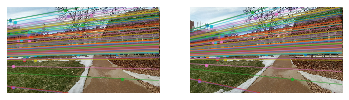

In [360]:
# Step 2: compute fundamental matrix
F = compute_F(pts1, pts2)
visualize_epipolar_lines(F, pts1, pts2, img_left, img_right)


In [361]:
print(F)
np.linalg.matrix_rank(F)


[[ 1.55425971e-07  1.49102977e-05 -4.92438684e-03]
 [-8.92360293e-06  2.31718438e-07 -1.24448847e-02]
 [ 2.99663208e-03  9.14510822e-03  9.99864122e-01]]


2

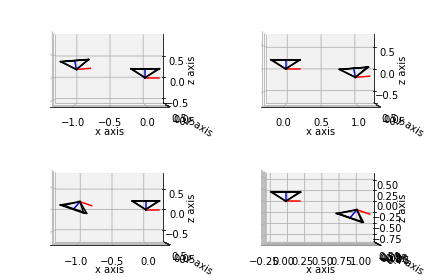

In [362]:
# Step 3: computes four sets of camera poses
K = np.array([[350, 0, 960/2], [0, 350, 540/2], [0, 0, 1]])
Rs, Cs = compute_camera_pose(F, K)
visualize_camera_poses(Rs, Cs)

In [363]:
def skew(x):
    output = np.array([[0,-x[2],x[1]],
                       [x[2],0,-x[0]],
                       [-x[1],x[0],0]])
    return output
                                      

In [364]:
def triangulation(P1, P2, pts1, pts2):
    # TO DO
    pts3D=np.zeros((len(pts1),3))
    for i in range(len(pts1)):
        A1 = skew(np.append(pts1[i,:],1)) @ P1
        A2 = skew(np.append(pts2[i,:],1)) @ P2                                             
        A  = np.concatenate((A1, A2), axis=0)  
        # print(A.shape)
        # Construct A matrix
        # Solve linear least squares to get 3D point
        # X(:,i) = point_3d;
        u, s, vh = np.linalg.svd(A)
        v= vh
        #v= vh.T
        #print(A1)
        p = v[:,-1]
        #print(p)
        pts3D[i,:] = p[:3]/p[3]
        #pts3D[i,:] = p[:3]*20
    return pts3D

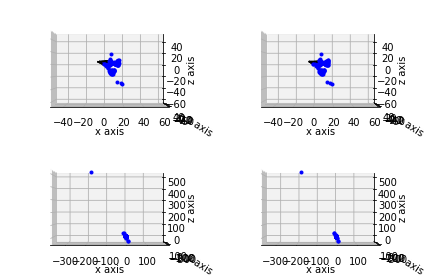

In [365]:
# Step 4: triangulation
pts3Ds = []
P1 = K @ np.hstack((np.eye(3), np.zeros((3, 1))))
for i in range(len(Rs)):
    P2 = K @ np.hstack((Rs[i], -Rs[i] @ Cs[i]))
    pts3D = triangulation(P1, P2, pts1, pts2)
    pts3Ds.append(pts3D)
visualize_camera_poses_with_pts(Rs, Cs, pts3Ds)


In [366]:
def disambiguate_pose(Rs, Cs, pts3Ds):
    # TO DO
    max_sum = 0
    id_n = 0
    #pts3D = np.zeros_like(pts3Ds[0])
    #print(len(Rs),len(Cs))
    #print(Rs[0][-1:])
    #print(Cs[0])
    #print(pts3Ds[0].shape)
    for i in range(len(Rs)):
        r = np.array(Rs[i][-1,:])
        idx = (pts3Ds[i]-Cs[i].T)@r
        if len(np.where(idx>0))>max_sum:
            max_sum =len(np.where(idx>0))
            id_n = i
    R = Rs[id_n]
    C = Cs[id_n]
    pts3D = pts3Ds[id_n]
    return R, C, pts3D

In [367]:
 # Step 5: disambiguate camera poses
R, C, pts3D = disambiguate_pose(Rs, Cs, pts3Ds)
#print(pts3D)

In [368]:
def compute_rectification(K, R, C):
    # TO DO
    C = np.reshape(C, (1,3))  # make sure C is 1x3

    rx = -C / np.linalg.norm(C)
    rz_tilde = np.array([0, 0, 1])
    rz = (rz_tilde - (rz_tilde @ rx.T) @ rx)/ np.linalg.norm((rz_tilde - (rz_tilde @ rx.T) @ rx))
    rz = rz.reshape((1,3))
    ry = np.cross(rz, rx)
    
    print(rx.shape,ry.shape,rz.shape)
    R_rect = np.concatenate((rx,ry,rz), axis=0)

    H1 = K @ R_rect @ np.linalg.inv(K);
    H2 = K @ R_rect @ R.T @ np.linalg.inv(K);
    return H1, H2

(1, 3) (1, 3) (1, 3)


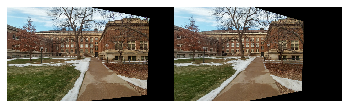

In [402]:
# Step 6: rectification
H1, H2 = compute_rectification(K, R, C)
img_left_w = cv2.warpPerspective(img_left, H1, (img_left.shape[1], img_left.shape[0]))
img_right_w = cv2.warpPerspective(img_right, H2, (img_right.shape[1], img_right.shape[0]))
visualize_img_pair(img_left_w, img_right_w)

In [403]:
print(F)
np.linalg.matrix_rank(F)
np.save("good_F_9",F)

[[ 1.55425971e-07  1.49102977e-05 -4.92438684e-03]
 [-8.92360293e-06  2.31718438e-07 -1.24448847e-02]
 [ 2.99663208e-03  9.14510822e-03  9.99864122e-01]]


In [521]:
def dense_match(img1, img2):
    # TO DO
    sift = cv2.xfeatures2d.SIFT_create()

    stride= 1
    size =3
    
    ## 不确定 KeyPoint(x, y, size)
    kp = [cv2.KeyPoint(x, y, size) for y in range(0, img1.shape[0], stride) 
                                    for x in range(0, img1.shape[1], stride)]

    kp_1, disp_1_pre = sift.compute(img1 , kp)
    
    
    kp = [cv2.KeyPoint(x, y, size) for y in range(0, img2.shape[0], stride) 
                                    for x in range(0, img2.shape[1], stride)]
    kp_2, disp_2_pre = sift.compute(img2 , kp)
    
    disp_1 = disp_1_pre.reshape((img1.shape[0],img1.shape[1],disp_1_pre.shape[-1]))
    disp_2 = disp_2_pre.reshape((img2.shape[0],img2.shape[1],disp_2_pre.shape[-1]))
    
    
    disparity = np.zeros_like(img1)
    for  i in range(img1.shape[0]):

        nbrs = NearestNeighbors(radius=1.0).fit(disp_1[i,:,:])

        distances, indices =nbrs.kneighbors(disp_2[i,:,:],n_neighbors=1) 
        
        idx = np.argmin(np.abs(indices - i), axis=1)
        #print(len(idx),indices.shape)
        final_smooth_one = indices[np.arange(len(idx)),idx]
        
        disparity[i,:] = abs(final_smooth_one-np.arange(img1.shape[1]))
        #print(indices.ravel()-np.arange(img1.shape[1]))

    #print(indices)
    #base = np.arange(img1.shape[1])
    #final_base = np.matlib.repmat(base,img1.shape[0] , 1)
    #disparity =abs(disparity-final_base)
    return disparity

(1, 3) (1, 3) (1, 3)


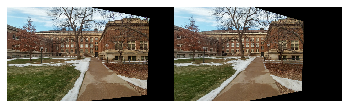

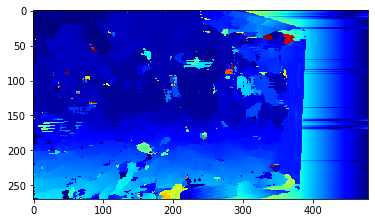

In [522]:
# Step 6: rectification
H1, H2 = compute_rectification(K, R, C)
img_left_w = cv2.warpPerspective(img_left, H1, (img_left.shape[1], img_left.shape[0]))
img_right_w = cv2.warpPerspective(img_right, H2, (img_right.shape[1], img_right.shape[0]))
visualize_img_pair(img_left_w, img_right_w)
# Step 7: generate disparity map
img_left_w = cv2.resize(img_left_w, (int(img_left_w.shape[1] / 2), int(img_left_w.shape[0] / 2)))  # resize image for speed
img_right_w = cv2.resize(img_right_w, (int(img_right_w.shape[1] / 2), int(img_right_w.shape[0] / 2)))
img_left_w = cv2.cvtColor(img_left_w, cv2.COLOR_BGR2GRAY)  # convert to gray scale
img_right_w = cv2.cvtColor(img_right_w, cv2.COLOR_BGR2GRAY)
disparity = dense_match(img_left_w, img_right_w)
visualize_disparity_map(disparity)

In [510]:
disparity[1,:]

array([  0,   0,   1,   1,   0,   0,   0,   4,   4,   4,   4,   5,   5,
         5,   5,   5,   5,   6,   7,   7,   7,   6,   5,   4,   8,   7,
         5,   4,   3,   2,   2,   5,   4,   3,   2,   2,   4,   3,   2,
         1,   1,   1,   3,   2,   1,   1,   4,   3,   2,   2,   3,   3,
         2,   1,   1,   3,   2,   1,   0,   0,   3,   2,   1,   1,   0,
         0,   1,   1,   0,   0,   3,   2,   1,   1,   0,   1,   1,   1,
         1,   1,   2,   1,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   3,   3,   3,
         3,   4,   7,   6,  12,  12,  12,  11,  13,  13,  12,  12,  11,
        12,  12,  11,  11,  11,  11,  11,  10,  10,  11,  11,  11,  11,
        11,  11,  10,  12,  11,  11,  11,  12,  11,  11,  11,  12,  12,
        11,  11,  11,  11,  11,  11,  11,  11,  11,  11,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  12,  1

In [431]:
#sift = cv2.xfeatures2d.SIFT_create()

#stride= 1
    
## 不确定 KeyPoint(x, y, size)
#kp = [cv2.KeyPoint(x, y, 1) for y in range(0, img.shape[0], stride) 
#                                    for x in range(0, img.shape[1], stride)]

#kp1, dense_feature = sift.compute(img , kp)

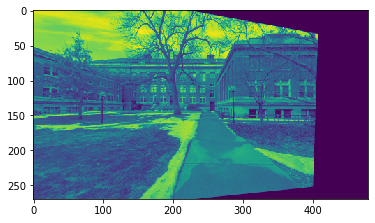

In [428]:
plt.imshow(img_left_w)

In [392]:
270*480

129600

In [6]:
# PROVIDED functions
def compute_camera_pose(F, K):
    E = K.T @ F @ K
    R_1, R_2, t = cv2.decomposeEssentialMat(E)
    # 4 cases
    R1, t1 = R_1, t
    R2, t2 = R_1, -t
    R3, t3 = R_2, t
    R4, t4 = R_2, -t

    Rs = [R1, R2, R3, R4]
    ts = [t1, t2, t3, t4]
    Cs = []
    for i in range(4):
        Cs.append(-Rs[i].T @ ts[i])
    return Rs, Cs


def visualize_img_pair(img1, img2):
    img = np.hstack((img1, img2))
    if img1.ndim == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()


def visualize_find_match(img1, img2, pts1, pts2):
    assert pts1.shape == pts2.shape, 'x1 and x2 should have same shape!'
    img_h = img1.shape[0]
    scale_factor1 = img_h/img1.shape[0]
    scale_factor2 = img_h/img2.shape[0]
    img1_resized = cv2.resize(img1, None, fx=scale_factor1, fy=scale_factor1)
    img2_resized = cv2.resize(img2, None, fx=scale_factor2, fy=scale_factor2)
    pts1 = pts1 * scale_factor1
    pts2 = pts2 * scale_factor2
    pts2[:, 0] += img1_resized.shape[1]
    img = np.hstack((img1_resized, img2_resized))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), aspect='auto')
    for i in range(pts1.shape[0]):
        plt.plot([pts1[i, 0], pts2[i, 0]], [pts1[i, 1], pts2[i, 1]], 'b.-', linewidth=0.5, markersize=5)
    plt.axis('off')
    plt.show()


def visualize_epipolar_lines(F, pts1, pts2, img1, img2):
    assert pts1.shape == pts2.shape, 'x1 and x2 should have same shape!'
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

    for i in range(pts1.shape[0]):
        x1, y1 = int(pts1[i][0] + 0.5), int(pts1[i][1] + 0.5)
        ax1.scatter(x1, y1, s=5)
        p1, p2 = find_epipolar_line_end_points(img2, F, (x1, y1))
        ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=0.5)

    for i in range(pts2.shape[0]):
        x2, y2 = int(pts2[i][0] + 0.5), int(pts2[i][1] + 0.5)
        ax2.scatter(x2, y2, s=5)
        p1, p2 = find_epipolar_line_end_points(img1, F.T, (x2, y2))
        ax1.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=0.5)

    ax1.axis('off')
    ax2.axis('off')
    plt.show()


def find_epipolar_line_end_points(img, F, p):
    img_width = img.shape[1]
    el = np.dot(F, np.array([p[0], p[1], 1]).reshape(3, 1))
    p1, p2 = (0, -el[2] / el[1]), (img.shape[1], (-img_width * el[0] - el[2]) / el[1])
    _, p1, p2 = cv2.clipLine((0, 0, img.shape[1], img.shape[0]), p1, p2)
    return p1, p2


def visualize_camera_poses(Rs, Cs):
    assert(len(Rs) == len(Cs) == 4)
    fig = plt.figure()
    R1, C1 = np.eye(3), np.zeros((3, 1))
    for i in range(4):
        R2, C2 = Rs[i], Cs[i]
        ax = fig.add_subplot(2, 2, i+1, projection='3d')
        draw_camera(ax, R1, C1)
        draw_camera(ax, R2, C2)
        set_axes_equal(ax)
        ax.set_xlabel('x axis')
        ax.set_ylabel('y axis')
        ax.set_zlabel('z axis')
        ax.view_init(azim=-90, elev=0)
    fig.tight_layout()
    plt.show()


def visualize_camera_poses_with_pts(Rs, Cs, pts3Ds):
    assert(len(Rs) == len(Cs) == 4)
    fig = plt.figure()
    R1, C1 = np.eye(3), np.zeros((3, 1))
    for i in range(4):
        R2, C2, pts3D = Rs[i], Cs[i], pts3Ds[i]
        ax = fig.add_subplot(2, 2, i+1, projection='3d')
        draw_camera(ax, R1, C1, 5)
        draw_camera(ax, R2, C2, 5)
        ax.plot(pts3D[:, 0], pts3D[:, 1], pts3D[:, 2], 'b.')
        set_axes_equal(ax)
        ax.set_xlabel('x axis')
        ax.set_ylabel('y axis')
        ax.set_zlabel('z axis')
        ax.view_init(azim=-90, elev=0)
    fig.tight_layout()
    plt.show()


def draw_camera(ax, R, C, scale=0.2):
    axis_end_points = C + scale * R.T  # (3, 3)
    vertices = C + scale * R.T @ np.array([[1, 1, 1], [-1, 1, 1], [-1, -1, 1], [1, -1, 1]]).T  # (3, 4)
    vertices_ = np.hstack((vertices, vertices[:, :1]))  # (3, 5)

    # draw coordinate system of camera
    ax.plot([C[0], axis_end_points[0, 0]], [C[1], axis_end_points[1, 0]], [C[2], axis_end_points[2, 0]], 'r-')
    ax.plot([C[0], axis_end_points[0, 1]], [C[1], axis_end_points[1, 1]], [C[2], axis_end_points[2, 1]], 'g-')
    ax.plot([C[0], axis_end_points[0, 2]], [C[1], axis_end_points[1, 2]], [C[2], axis_end_points[2, 2]], 'b-')

    # draw square window and lines connecting it to camera center
    ax.plot(vertices_[0, :], vertices_[1, :], vertices_[2, :], 'k-')
    ax.plot([C[0], vertices[0, 0]], [C[1], vertices[1, 0]], [C[2], vertices[2, 0]], 'k-')
    ax.plot([C[0], vertices[0, 1]], [C[1], vertices[1, 1]], [C[2], vertices[2, 1]], 'k-')
    ax.plot([C[0], vertices[0, 2]], [C[1], vertices[1, 2]], [C[2], vertices[2, 2]], 'k-')
    ax.plot([C[0], vertices[0, 3]], [C[1], vertices[1, 3]], [C[2], vertices[2, 3]], 'k-')


def set_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range, x_middle = abs(x_limits[1] - x_limits[0]), np.mean(x_limits)
    y_range, y_middle = abs(y_limits[1] - y_limits[0]), np.mean(y_limits)
    z_range, z_middle = abs(z_limits[1] - z_limits[0]), np.mean(z_limits)

    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])


def visualize_disparity_map(disparity):
    plt.imshow(disparity, cmap='jet')
    plt.show()

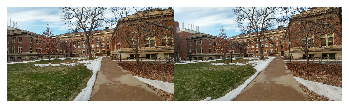

ValueError: too many values to unpack (expected 2)

In [160]:
if __name__ == '__main__':
    # read in left and right images as RGB images
    img_left = cv2.imread('./left.bmp', 1)
    img_right = cv2.imread('./right.bmp', 1)
    visualize_img_pair(img_left, img_right)

    # Step 1: find correspondences between image pair
    pts1, pts2 = find_match(img_left, img_right)
    visualize_find_match(img_left, img_right, pts1, pts2)


In [ ]:

    # Step 2: compute fundamental matrix
    F = compute_F(pts1, pts2)
    visualize_epipolar_lines(F, pts1, pts2, img_left, img_right)

    # Step 3: computes four sets of camera poses
    K = np.array([[350, 0, 960/2], [0, 350, 540/2], [0, 0, 1]])
    Rs, Cs = compute_camera_pose(F, K)
    visualize_camera_poses(Rs, Cs)

    # Step 4: triangulation
    pts3Ds = []
    P1 = K @ np.hstack((np.eye(3), np.zeros((3, 1))))
    for i in range(len(Rs)):
        P2 = K @ np.hstack((Rs[i], -Rs[i] @ Cs[i]))
        pts3D = triangulation(P1, P2, pts1, pts2)
        pts3Ds.append(pts3D)
    visualize_camera_poses_with_pts(Rs, Cs, pts3Ds)

    # Step 5: disambiguate camera poses
    R, C, pts3D = disambiguate_pose(Rs, Cs, pts3Ds)

    # Step 6: rectification
    H1, H2 = compute_rectification(K, R, C)
    img_left_w = cv2.warpPerspective(img_left, H1, (img_left.shape[1], img_left.shape[0]))
    img_right_w = cv2.warpPerspective(img_right, H2, (img_right.shape[1], img_right.shape[0]))
    visualize_img_pair(img_left_w, img_right_w)

    # Step 7: generate disparity map
    img_left_w = cv2.resize(img_left_w, (int(img_left_w.shape[1] / 2), int(img_left_w.shape[0] / 2)))  # resize image for speed
    img_right_w = cv2.resize(img_right_w, (int(img_right_w.shape[1] / 2), int(img_right_w.shape[0] / 2)))
    img_left_w = cv2.cvtColor(img_left_w, cv2.COLOR_BGR2GRAY)  # convert to gray scale
    img_right_w = cv2.cvtColor(img_right_w, cv2.COLOR_BGR2GRAY)
    disparity = dense_match(img_left_w, img_right_w)
    visualize_disparity_map(disparity)

    # save to mat
    sio.savemat('stereo.mat', mdict={'pts1': pts1, 'pts2': pts2, 'F': F, 'pts3D': pts3D, 'H1': H1, 'H2': H2,
                                     'img_left_w': img_left_w, 'img_right_w': img_right_w, 'disparity': disparity})
